# Generating Maps of Cold Galactic Clumps from the Planck Galactic Cold Clump (PGCC) Catalogue
### We also will be reading in Planck GNILC maps and adding these Galactic Cold Clump maps to test the position/scale/orientation of the sources and see if they are present in the GNILC Maps.
### Finally we also have an example of scaling the frequency from the measured 353 GHz data in the PGCC catalogue to a new frequency to be used by SO (in this example 27 GHz) 

In [5]:
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from add_planck_galccs.generate_galcc_maps import galcc_mapper
import pysm3.units as u
import pandas as pd
import mapsims
from pathlib import Path


# Read Planck Cold Galactic Clump Catalogue
df = pd.read_csv('PGCC.csv')
glons = df['glon']
glats = df['glat']
# Read Planck full and GNILC maps
planck_map, h = hp.read_map("/global/homes/j/justinc/Galactic Cold Clumps/HFI_SkyMap_353_2048_R2.02_full.fits", h = True)
gnilc_map_353, gh3 = hp.read_map("/global/homes/j/justinc/Galactic Cold Clumps/Data/COM_CompMap_Dust-GNILC-F353_2048_R2.00.fits", h = True)
gnilc_map_545, gh5 = hp.read_map("/global/homes/j/justinc/Galactic Cold Clumps/Data/COM_CompMap_Dust-GNILC-F545_2048_R2.00.fits", h = True)
gnilc_map_857, gh8 = hp.read_map("/global/homes/j/justinc/Galactic Cold Clumps/Data/COM_CompMap_Dust-GNILC-F857_2048_R2.00.fits", h = True)
GNILC_DATA_FOLDERS = "/global/project/projectdirs/cmb/www/pysm-data/dust_gnilc/"  # NERSC
datadir = Path(GNILC_DATA_FOLDERS)
gnilc_dust_Td_nside2048, th = hp.read_map(datadir / "gnilc_dust_Td_nside2048.fits", h = True)
gnilc_dust_Bd_nside2048, bh = hp.read_map(datadir / "gnilc_dust_beta_nside2048.fits", h = True)

In [ ]:
# Generate Galactic Cold Clump Maps at specified frequencies
blank = galcc_mapper()
galccmap_353 = blank.galcc_map(catalogue = "PGCC.csv", 
                           freq_out = 353, 
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False, 
                           output_units = u.MJy/u.sr)

galccmap_545 = blank.galcc_map(catalogue = "PGCC.csv", 
                           freq_out = 545, 
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False, 
                           output_units = u.MJy/u.sr)

galccmap_857 = blank.galcc_map(catalogue = "PGCC.csv", 
                           freq_out = 857, 
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False, 
                           output_units = u.MJy/u.sr)

galccmap_temp = blank.spectral_map(catalogue = "PGCC.csv", 
                           maptype = 'temp',
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False)

galccmap_beta = blank.spectral_map(catalogue = "PGCC.csv", 
                           maptype = 'beta',
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False)

In [7]:
# Add Galactic Cold Clump Maps to Planck GNILC frequency, temperature and beta maps
combined_gnilcmap_353 = gnilc_map_353.copy()
combined_gnilcmap_545 = gnilc_map_545.copy()
combined_gnilcmap_857 = gnilc_map_857.copy()
combined_gnilcmap_353 += galccmap_353
combined_gnilcmap_545 += galccmap_545
combined_gnilcmap_857 += galccmap_857

combined_gnilcmap_temp = gnilc_dust_Td_nside2048.copy()
combined_gnilcmap_beta = gnilc_dust_Bd_nside2048.copy()
combined_gnilcmap_temp += galccmap_temp
combined_gnilcmap_beta += galccmap_beta

# Planck GNILC Maps (left) with added Planck Galactic Cold Clumps (right)
## Note the essentially 1-1 correlation between sources in the GNILC maps with the sources from PGCC catalogue generated maps
### Also note a difference in brightness, unsure still as to the cause of this

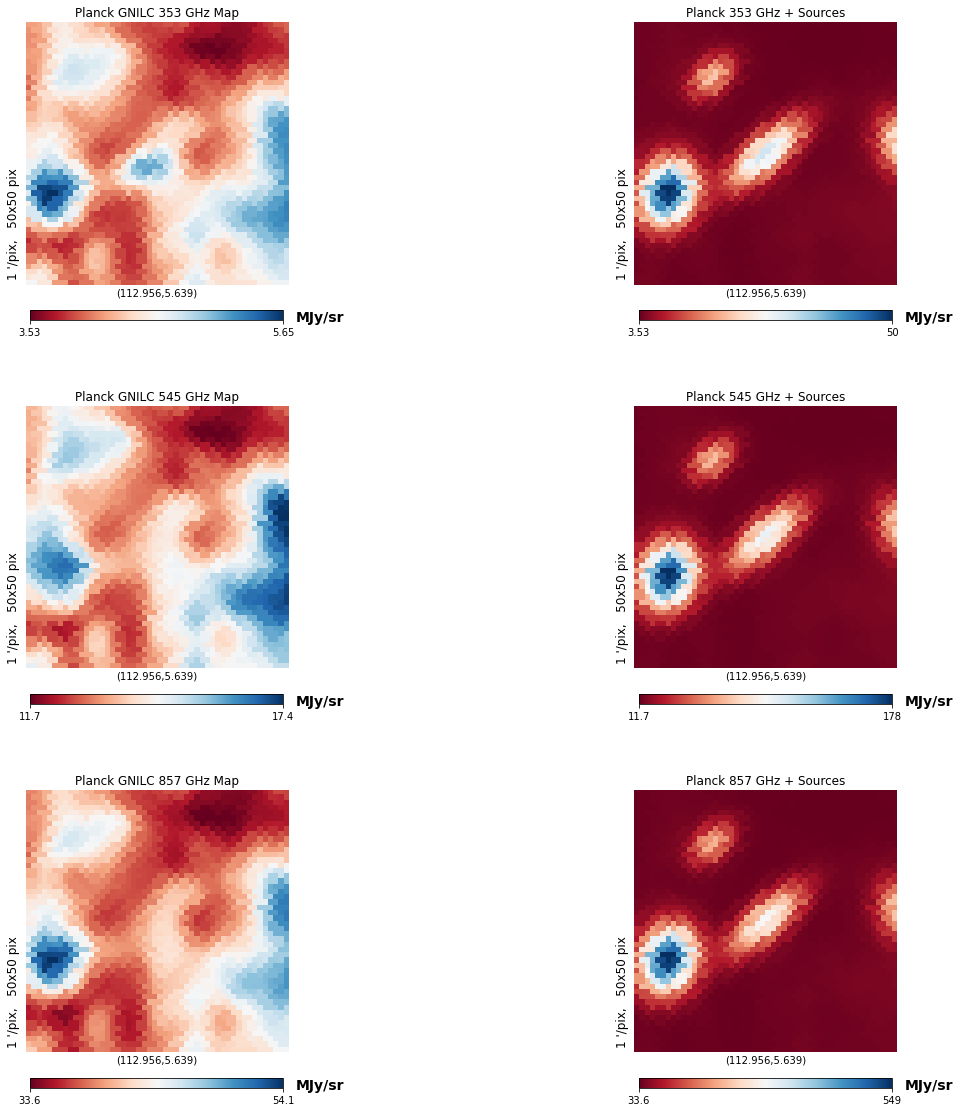

In [8]:
rot = [glons[1], glats[1]]
reso = 1
xsize = ysize = 50

gs = gridspec.GridSpec(3, 2)
plt.figure(figsize = (20, 20))
ax = plt.subplot(gs[0, 0])
hp.gnomview(gnilc_map_353, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC 353 GHz Map', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)
ax = plt.subplot(gs[0, 1])
hp.gnomview(combined_gnilcmap_353, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck 353 GHz + Sources', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)

ax = plt.subplot(gs[1, 0])
hp.gnomview(gnilc_map_545, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC 545 GHz Map', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)
ax = plt.subplot(gs[1, 1])
hp.gnomview(combined_gnilcmap_545, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck 545 GHz + Sources', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)

ax = plt.subplot(gs[2, 0])
hp.gnomview(gnilc_map_857, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC 857 GHz Map', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)
ax = plt.subplot(gs[2, 1])
hp.gnomview(combined_gnilcmap_857, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck 857 GHz + Sources', unit = 'MJy/sr',
            cmap = 'RdBu', hold = True)

# Temperature and Beta Planck GNILC Maps with added PGCC sources
### Note no apparent correlation between sources and temperature or beta maps

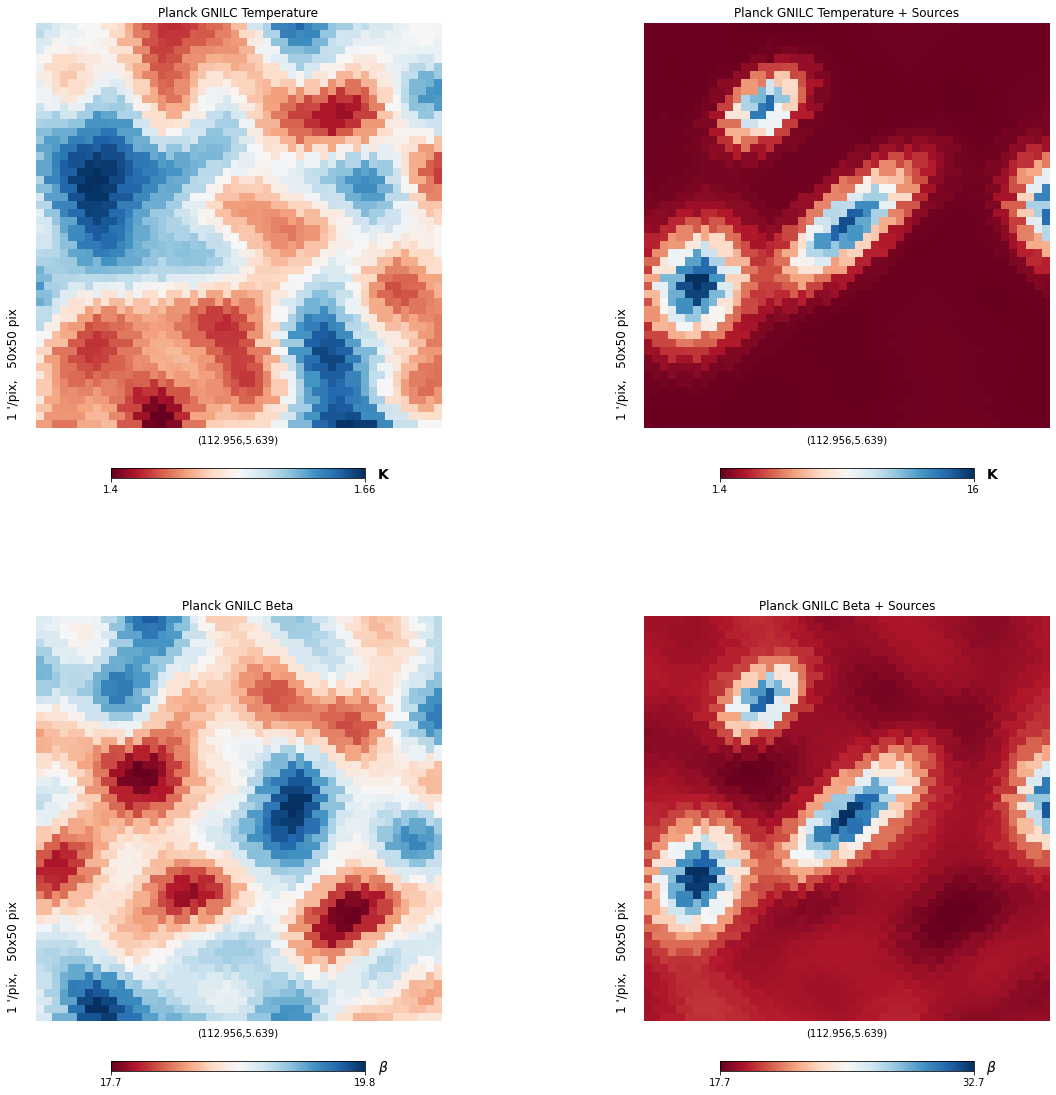

In [9]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize = (20, 20))

ax = plt.subplot(gs[0, 0])
hp.gnomview(gnilc_dust_Bd_nside2048, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC Temperature', unit = 'K',
            cmap = 'RdBu', hold = True)
ax = plt.subplot(gs[0, 1])
hp.gnomview(combined_gnilcmap_beta, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC Temperature + Sources', unit = 'K',
            cmap = 'RdBu', hold = True)


ax = plt.subplot(gs[1, 0])
hp.gnomview(gnilc_dust_Td_nside2048, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC Beta', unit = '$\\beta$',
            cmap = 'RdBu', hold = True)
ax = plt.subplot(gs[1, 1])
hp.gnomview(combined_gnilcmap_temp, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'Planck GNILC Beta + Sources', unit = '$\\beta$', 
            cmap = 'RdBu', hold = True)

plt.savefig('temp_beta_Sources.jpg')

# Scaling Frequency Example: 
## From 353 GHz to 27 GHz

In [10]:
galccmap_27 = galcc_mapper().galcc_map(catalogue = "PGCC.csv", 
                           freq_out = 27, 
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = False, 
                           output_units = u.uK_CMB)

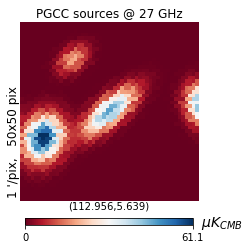

In [11]:
hp.gnomview(galccmap_27, rot = rot, reso = reso, xsize = xsize, ysize = ysize, 
            title = 'PGCC sources @ 27 GHz', unit = '$\\mu K_{CMB}$', min = 0,
            cmap = 'RdBu', hold = True)